<a href="https://colab.research.google.com/github/jigyasapal/CODEXINTERN-Internship/blob/main/2_Spam_Mail_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [8]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1', sep='\t', header=None)
df.columns = ['label', 'message']
print(df.columns)
display(df.head())

Index(['label', 'message'], dtype='object')


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def preprocess(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [14]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.9650224215246637
Precision: 0.9910714285714286
Recall: 0.7449664429530202
F1 Score: 0.8505747126436781


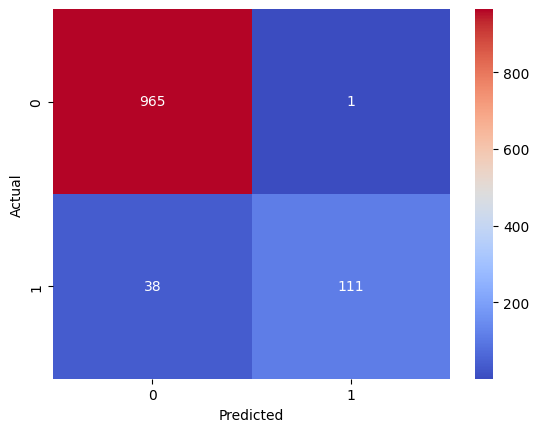

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
